In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

In [2]:
data = pd.read_csv("restaurent.csv")
display(data)

,food,decor,service,price
0,18.0,22.0,17.0,41.0
1,24.0,22.0,22.0,54.0
2,18.0,17.0,14.0,32.0
3,18.0,9.0,13.0,20.0
4,21.0,12.0,16.0,25.0
...,...,...,...,...
109,20.0,21.0,18.0,40.0
110,18.0,14.0,16.0,30.0
111,17.0,17.0,18.0,34.0
112,20.0,22.0,21.0,51.0


In [3]:
l = data.sample(50)

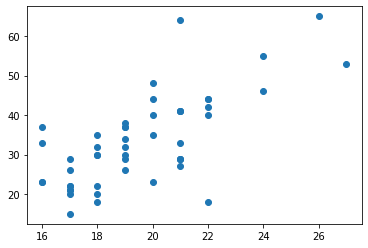

In [4]:
plt.scatter(l['food'],l['price'])
plt.show()

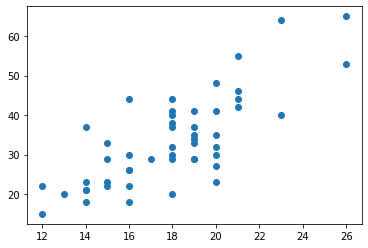

In [5]:
plt.scatter(l['service'],l['price'])
plt.show()

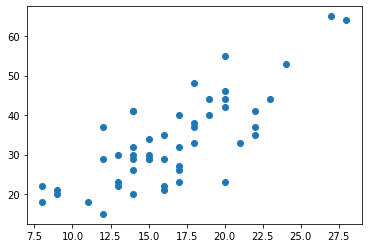

In [6]:
plt.scatter(l['decor'],l['price'])
plt.show()

In [7]:
# function for pre-processing the data
def pre_process(data, train=True, val_split=0.8, seed=1234):
    # remove the NaN values from data
    for i in range(data.shape[1]):
        data = data.iloc[data.iloc[:, i].notna().to_numpy()]
    if train:
        data = data.iloc[:, 1:] # exclude the "Id" column
        np.random.seed(seed)
        split = val_split
        indices = np.arange(data.shape[0])  
        np.random.shuffle(indices)  # shuffle indices for validation split
        mu = data.iloc[:, :-1].mean(0)  # calculate mean
        sigma = data.iloc[:, :-1].std(0)    # calculate std
        # split the train and validation sets
        X_train, y_train, X_val, y_val = data.iloc[indices[:int(split*len(indices))], :-1], data.iloc[indices[:int(split*len(indices))], -1], data.iloc[indices[int(split*len(indices)):], :-1], data.iloc[indices[int(split*len(indices)):], -1]   

        X_train -= mu
        X_train /= sigma    # normalize the train set
        X_val -= mu
        X_val /= sigma  # normalize the validation set
        X_train = np.c_[np.ones(len(X_train),dtype='int64'), X_train.to_numpy()]    # append 1s to the features in train set
        X_val = np.c_[np.ones(len(X_val),dtype='int64'), X_val.to_numpy()]  # append 1s to the features in validation set
        
        print(f'\nTraining Size: {X_train.shape[0]}')
        print(f'Validation Size: {X_val.shape[0]}')
        print(f'Number of features: {X_train.shape[1]}')

        return X_train, y_train.to_numpy(), X_val, y_val.to_numpy()

    else:
        data = data.iloc[:, 1:] # exclude the "Id" column
        mu = data.mean(0)   # calculate mean
        sigma = data.std(0) # calculate std
        X_test = data
        X_test -= mu
        X_test /= sigma # normalize the test set
        X_test = np.c_[np.ones(len(X_test),dtype='int64'), X_test.to_numpy()]    # append 1s to the features in test set
        
        print(f'Testing Size: {X_test.shape[0]}')
        return X_test

In [8]:
class LinReg:
    '''
    Linear Regression Model
    '''
    def __init__(self):
        # place_holders
        self.coeffs = None
        self.alpha = 0.1
        self.iterations = 100
        self.train_loss = []

    def train(self, X, y):
        # train using batch gradient descent
        self.train_loss.append(self.criterion(X, y))    # append initial loss
        for t in tqdm(range(self.iterations)):
            gradient = np.dot(X.T, (np.dot(X, self.coeffs) - y)) / len(y)   # compute gradient of cost function
            self.coeffs -= self.alpha * gradient    # update weights
            loss = self.criterion(X, y) # compute loss
            self.train_loss.append(loss)    # append loss
    
    def fit(self, X, y, alpha=0.1, ITERATIONS=100, coeffs=None):
        # main function of linear regression
        if coeffs == None:
            self.coeffs = np.zeros(X.shape[1])  # initalise coefficients to zeros
        else:
            self.coeffs = coeffs
        self.alpha = alpha  # learning rate
        self.iterations = ITERATIONS    # number of iterations
        self.train(X, y)    # train

    def predict(self, X, do_print=True):
        # predict the sale price using computed weights
        if do_print:
            print(np.dot(X, self.coeffs))
        else:
            return np.dot(X, self.coeffs)

    def criterion(self, X, y):
        # cost function
        return np.sum((X.dot(self.coeffs) - y) ** 2) / (2 * len(y))
    
    def score(self, X, target):
        # computing r^2 (coefficient)
        predictions = self.predict(X, do_print=False)   # get predictions
        tss = np.sum((target - target.mean()) ** 2) # total sum of squares
        rss = np.sum((predictions - target) ** 2)   # residual sum of squares
        r2 = 1 - (rss/tss)  # r^2 coefficient
        print(f'\n{r2}')
    
    def mse(self, X, target):
        # computing normalised mean squared error
        predictions = self.predict(X, do_print=False)   # get predictions
        mse = (predictions - target) ** 2   # sqaured errors
        mse = np.sum(mse) / (len(target) * np.max(mse)) # sum squared errors / len(y) * max(error)
        print(mse)
    
    def get_params(self):
        # get weights and loss
        return self.coeffs, self.train_loss

In [9]:
X_train, y_train, X_val, y_val = pre_process(l)


Training Size: 40
Validation Size: 10
Number of features: 3


In [10]:
lr = LinReg()
lr.fit(X_train, y_train)
coeffs, losses = lr.get_params()
lr.score(X_val,y_val)
lr.mse(X_val,y_val)

100%|██████████| 100/100 [00:00<00:00, 50424.43it/s]


0.493988635286043
0.33642610591725525


In [11]:
print(coeffs)

[33.04658725  6.16004022  4.81495551]


In [12]:
lr.predict(np.array([125,148,265]))

6318.472570345609
